In [94]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from __future__ import division

In [155]:
exp1 = np.fromfile('/home/sergey/Documents/exp_cx1.dat',dtype=float,count=-1, sep=" ")
th1 = np.fromfile('/home/sergey/Documents/th1.txt',dtype=float,count=-1, sep=" ")
th2 = np.fromfile('/home/sergey/Documents/th2.txt',dtype=float,count=-1, sep=" ")
th3 = np.fromfile('/home/sergey/Documents/th3.txt',dtype=float,count=-1, sep=" ")

In [156]:
exp1.shape


(10804,)

In [157]:
th1.shape

(120,)

In [346]:
exp1 = np.reshape(exp1, (2701,-1 ))
exp1.ndim
exp1.shape
exp1[0,2]
expt=[]
expt = exp1[1500:2000,1]
    
#for i in xrange (0,2701):
  #  if 1+10/7*exp1[i,0]>0: 
 #   exp1[i,0]=np.sqrt(1+10/7*exp1[i,0])-1
  #  else: 
   #     exp1[i,0]=exp1[i,0]-0.5 
        
            

In [162]:
expt.shape

(1000,)

In [163]:
th1 = np.reshape(th1, (120,-1 ))
th1.ndim
th1.shape
th2 = np.reshape(th2, (120,-1 ))
th3 = np.reshape(th3, (120,-1 ))

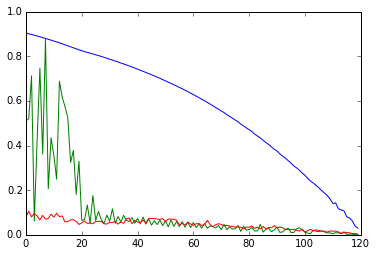

In [164]:
plt.plot(th1/100)
plt.plot(th2*1)
plt.plot(th3*1)
plt.savefig('/home/sergey/Documents/111', format='pdf')

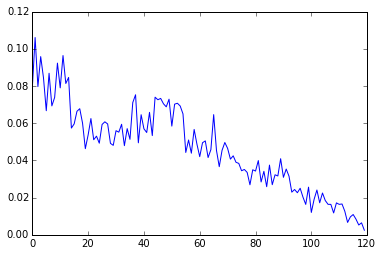

In [165]:
plt.plot(th3)

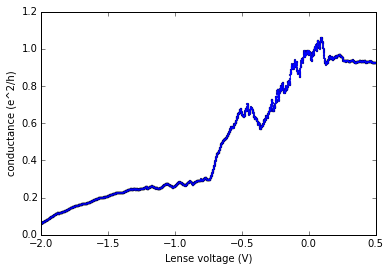

In [166]:
plt.plot(exp1[:,0],exp1[:,1]/0.001*25800/0.25, 'bo',mew=0.2, ms=2)
plt.plot(exp1[:,0],exp1[:,1]/0.001*25800/0.25)
#plt.plot(th1[:,0],th1[:,1]/0.001*25800/0.25, 'r',mew=0.3, ms=3)
plt.xlabel("Lense voltage (V)")
plt.ylabel("conductance (e^2/h)")
plt.xlim(-2,0.5)
#plt.ylim(0.38,1.1)
plt.savefig('/home/sergey/Documents/pl1', format='pdf')


## 

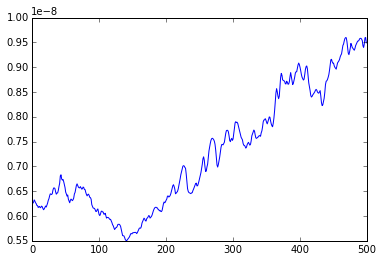

In [347]:
plt.plot(expt)

In [168]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [238]:
dat=baseline_als(expt,1000,0.0001,10)

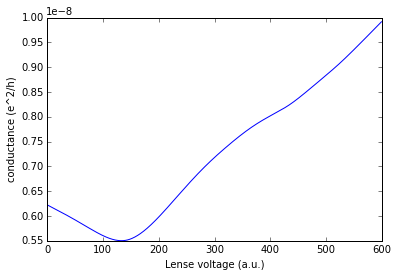

In [244]:
plt.plot(dat,mew=0.2, ms=2)
plt.xlabel("Lense voltage (a.u.)")
plt.ylabel("conductance (e^2/h)")
#plt.xlim(0,2700)
#plt.ylim(0.38,1.1)
plt.savefig('/home/sergey/Documents/pl2', format='pdf')

In [138]:
expt=expt-dat

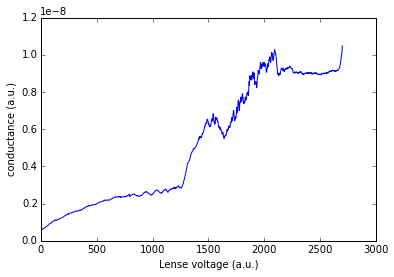

In [342]:
plt.plot(expt)
plt.xlabel("Lense voltage (a.u.)")
plt.ylabel("conductance (a.u.)")
#plt.xlim(0,2600)
#plt.ylim(0.38,1.1)
plt.savefig('/home/sergey/Documents/pl3', format='pdf')

In [171]:
expt.shape

(1000,)

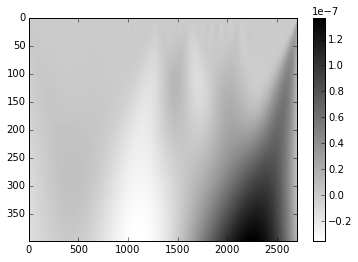

In [260]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 100, 0.25, endpoint=False)
sig = expt
widths = np.arange(1, 50)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(abs(cwtmatr), extent=[-1, 1, 1, 1000],cmap='PRGn',  aspect='auto', vmax=abs(cwtmatr).max(), vmin=0)
plt.colorbar()
plt.show()

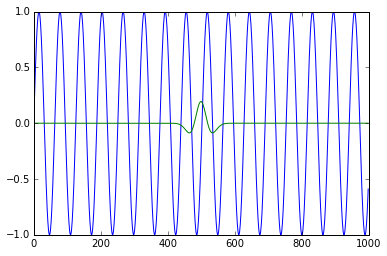

In [317]:
def make_sin_data(n=1000, st=0.1):
    ts = np.arange(0, n*st, st)
    ss = np.sin(np.arange(0, n*st, st))
    return ts, ss
points = 1000
a = 20.0
vec2 = signal.ricker(points, a)

sin_t, sin_s = make_sin_data(1000)
plt.plot(sin_s)
plt.plot(vec2)

100


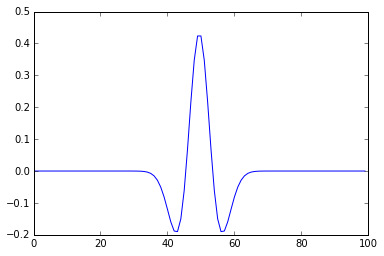

In [306]:
points = 100
a = 4.0
vec2 = signal.ricker(points, a)
print(len(vec2))
100
plt.plot(vec2)
plt.show()

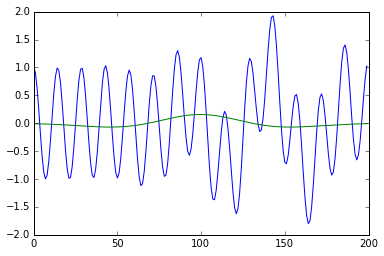

In [337]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
plt.plot(sig)
plt.plot(signal.ricker(200, 31))
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
#plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())


In [363]:
from scipy import signal
widths = np.arange(1, 100, 0.1)
sig = expt
w_coefs_bwn = signal.cwt(sig, signal.ricker, widths)
w_coefs_bwn_la = np.log(w_coefs_bwn*np.conjugate(w_coefs_bwn))





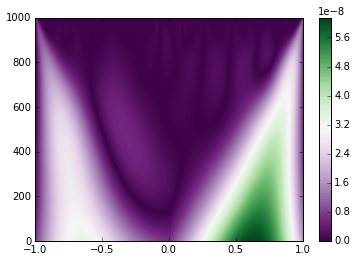

In [358]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 200, 10, endpoint=False)
#sig = sin_s
widths = np.arange(2, 100)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(abs(cwtmatr), extent=[-1, 1, 1, 1000],cmap='PRGn',  aspect='auto', vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
plt.colorbar()
plt.show()

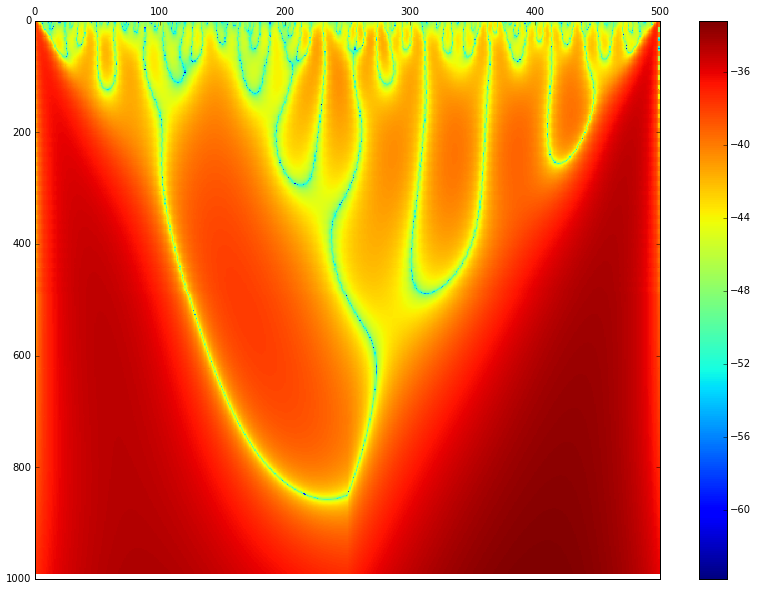

In [364]:
plt.figure(figsize=(14,10))
plt.pcolor((w_coefs_bwn_la))
plt.colorbar()
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.savefig('/home/sergey/Documents/wt1', format='png')
plt.show()


In [366]:
from scipy.lib.six import xrange
from scipy.stats import norm, scoreatpercentile

def create_w_coef_mask(w_coefs, epsilon=0.1, order=1):
    """
    Create a new matrix, the same shape as the wavelet coefficient one, but with zeros everywhere except for local
    maxima's. Epsilon here is used for ranking the strength of the local maxima.
    Assumes that the coefficient matrix coming in is already in absolute terms
    :param w_coefs: wavelet coefficient matrix
    :param epsilon: divided against the maxima, used for transparent ranking
    :param order: how many neighboors on a given row to look at to determine maxima
    :return: same shape array, see above
    """
    mask = np.zeros_like(w_coefs, dtype=int)
    for n, row in enumerate(w_coefs):
        maxs = signal.argrelmax(row, order=order)[0]
        mask[n, maxs] = row[maxs] / epsilon

    return mask


mask = create_w_coef_mask(w_coefs_bwn_la)
assert mask.shape == w_coefs_bwn_la.shape, (mask.shape, w_coefs_bwn_la.shape)

In [367]:
len(bifucations)

33

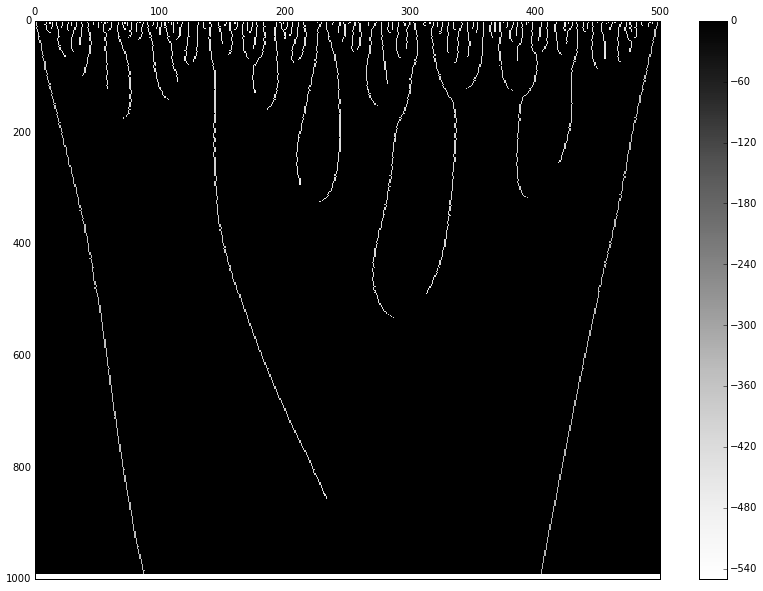

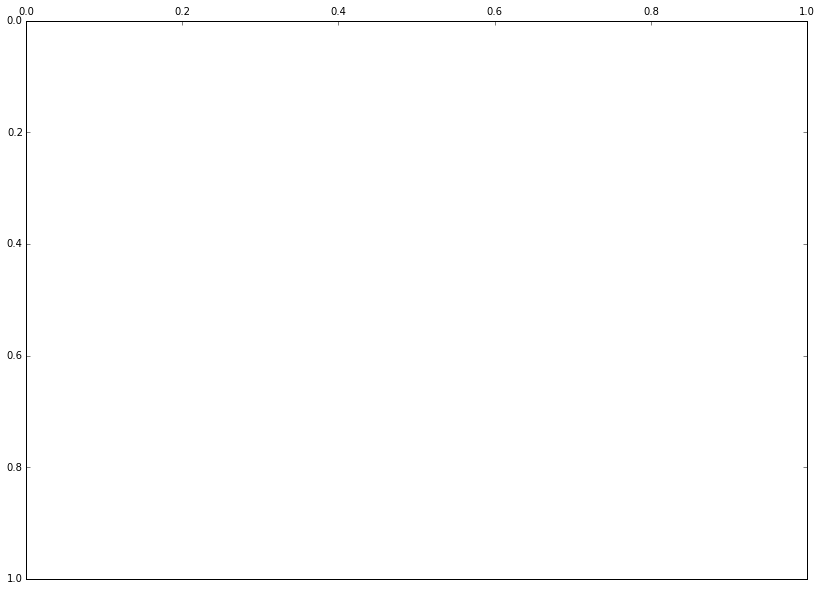

In [369]:
from wtmm.tracing import skeletor

test_sample = np.copy(mask)
bifucations = skeletor(test_sample, smallest_scale=2)

plt.figure(figsize=(14,10))
plt.pcolormesh(mask, cmap='Greys')
plt.colorbar()
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.show()

plt.figure(figsize=(14,10))
for n, (k, v) in enumerate(bifucations.iteritems()):
    rows, cols = zip(*v)
    plt.plot(cols, rows)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.show()


In [ ]:
from wtmm.tracing import walk_bifurcation
foo = walk_bifurcation(test_sample, 0, 700)
print foo

In [232]:
foo

(False, [])

In [ ]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
t = scipy.linspace(-2,0.7,701)


signal = expt

FFT = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, signal)
plt.xlim(-2,0,7)
pylab.subplot(212)
pylab.plot(freqs,np.log(FFT))

plt.savefig('/home/sergey/Documents/pl5', format='pdf')

